
# Import packages and import data (do not change this)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Read the dataset from CSV
data = pd.read_csv('Synapse.csv')


# Function to plot the confusion matrix (do not change this)

In [17]:

def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Function to plot the correlation matrix (do not change this)

In [18]:

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()


# Function to plot the correlation between features and the response variable (do not change this)

In [7]:

def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

# Define the feature set and the target variable (do not change this)

In [8]:
# Here we are asking to drop the featuers named "File" becuase its a text and not useful, and the label Bug because we can not have it amongs the features.
X = data.drop(['File', 'BUG'], axis=1)
# Here we are asking y to be the target variable, what we are trying to predict/ classify.
y = data['BUG']
x_bug = data.drop(['File'], axis=1)


# Here you get to choose which features to include. After runninng the entire code at least once, you can select which fetueres to be included to answer HW2 questions. 

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score

# Load the dataset
data = pd.read_csv('Synapse.csv')

# Manually select your features based on your own criteria or analysis
# Example: Select features such as ['WMC', 'CBO', 'RFC', 'LOC', 'SUM_LOC+']
# Modify this list based on your selection

selected_features = ['CA', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET',
       'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF']  # Example selection     

# Separate the features (X) and target variable (y)
X_selected = data[selected_features]  # Use only your selected features
y = data['BUG']  # Target variable (BUG)

# Split the dataset into training and test sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)

# Train the Logistic Regression classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate False Positive Rate (FPR) from the confusion matrix
def calculate_fpr(cm):
    tn, fp, fn, tp = cm.ravel()  # Unpack confusion matrix into individual elements
    return fp / (fp + tn)

fpr = calculate_fpr(cm)

# Print the results for Logistic Regression with selected features
print("Logistic Regression with Selected Features Only:")
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"MCC: {mcc:.4f}")

Logistic Regression with Selected Features Only:
Confusion Matrix:
[[101   9]
 [  4  31]]
Accuracy: 0.9103
Precision: 0.7750
Recall: 0.8857
FPR: 0.0818
MCC: 0.7697


In [135]:
# Split the dataset into training and test sets (you can adjust the size of test set here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


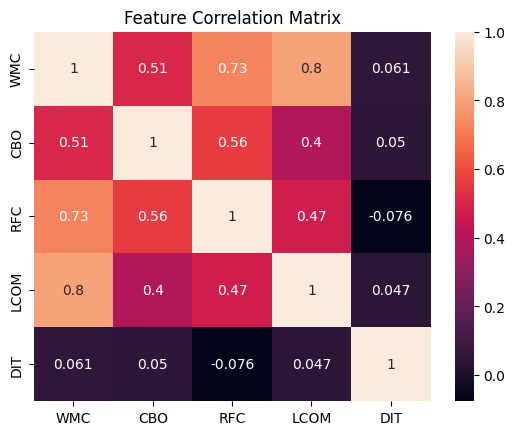

In [136]:
# Plot the correlation matrix for the features only in the dataset 
plot_correlation_matrix(X)

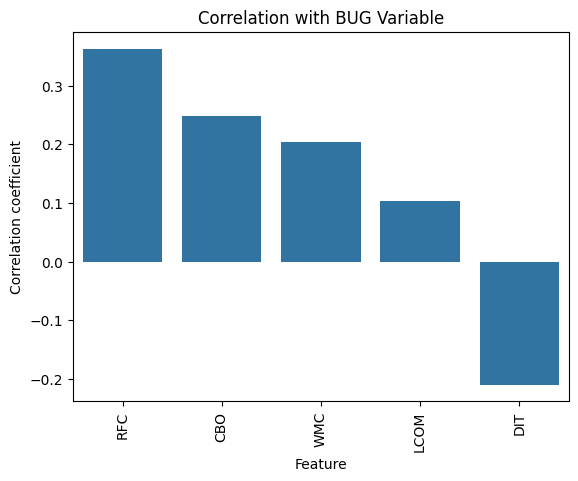

In [137]:

# Add the target variable back for correlation calculation (do not change this)
data_for_correlation = X.copy()
data_for_correlation['BUG'] = y

# Plot the correlation matrix for features and the BUG variable (do not change this)
plot_feature_response_correlation(data_for_correlation, 'BUG')


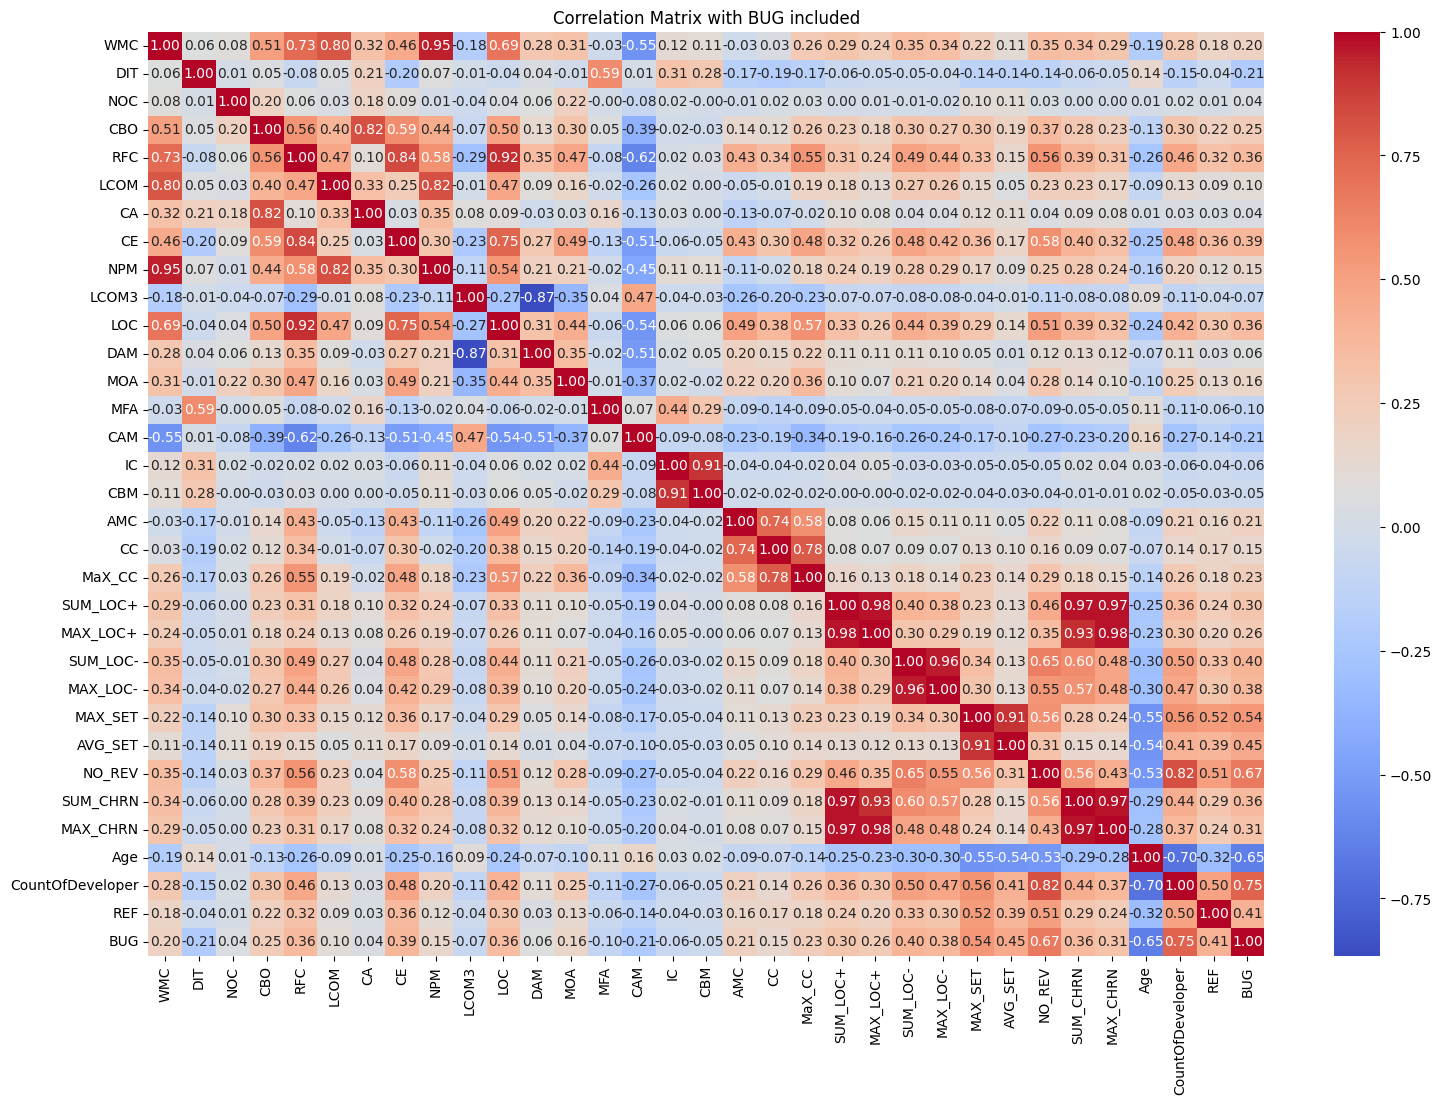

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the 'BUG' column (do not change this)

# Calculate the correlation matrix including all features and the response variable 'BUG'
correlation_matrix = x_bug.corr()

# Plot the correlation matrix
plt.figure(figsize=(18,  12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with BUG included')
plt.show()


# Define the classifiers (you can uncomment your choicses by removing the # to add to your execution)

In [163]:
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'LogisticRegression': LogisticRegression(max_iter=1000),
    #'SVC': SVC(probability=True, random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(random_state=42)

}

# Iterate through the classifiers and evaluate each one (do not change this)


Classifier: RandomForest
Confusion Matrix:
[[102   8]
 [  5  30]]


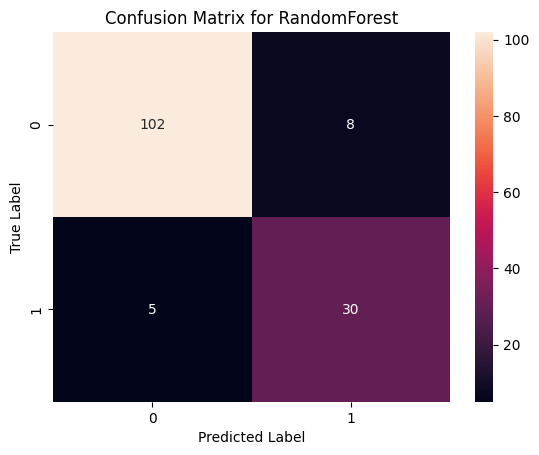

Performance Metrics for RandomForest:
Accuracy: 0.9103
Precision: 0.7895
Recall: 0.8571
FPR: 0.1364
MCC: 0.7633


In [164]:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print classifier name and confusion matrix
    print(f"\nClassifier: {name}")
    print(f"Confusion Matrix:\n{cm}")

    # Plot the confusion matrix
    plot_confusion_matrix(cm, name)

    # List all performance metrics
    print(f"Performance Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"FPR: {fpr:.4f}")
    print(f"MCC: {mcc:.4f}")


# You may add codes below

Accuracy: 0.9379
Precision: 0.8421
Recall: 0.9143
False Positive Rate (FPR): 0.1579
MCC: 0.8366


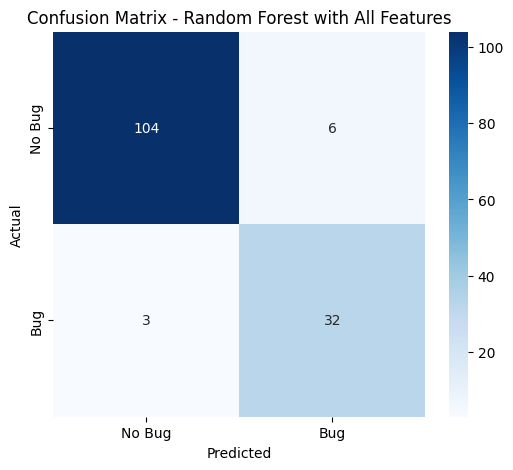

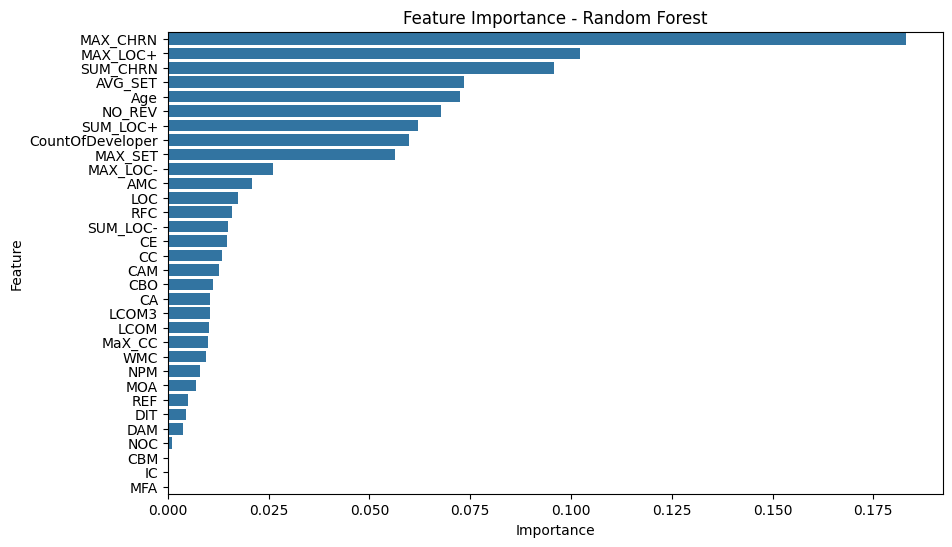

In [175]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame that contains your dataset

# Define all features (exclude the target variable 'BUG' and other non-numeric columns like 'File')
all_features = ['WMC', 'DIT', 'NOC', 'CBO', 'RFC', 'LCOM', 'CA', 'CE', 'NPM', 'LCOM3', 'LOC', 'DAM', 'MOA',
                'MFA', 'CAM', 'IC', 'CBM', 'AMC', 'CC', 'MaX_CC', 'SUM_LOC+', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-',
                'MAX_SET', 'AVG_SET', 'NO_REV', 'SUM_CHRN', 'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF']

# Separate the features (X) and target variable (y)
X_all = data[all_features]  # All features
y = data['BUG']  # Target variable 'BUG'

# Split the dataset into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
fpr = confusion_matrix(y_test, y_pred)[0][1] / (confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][1])
mcc = matthews_corrcoef(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"MCC: {mcc:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bug', 'Bug'], yticklabels=['No Bug', 'Bug'])
plt.title('Confusion Matrix - Random Forest with All Features')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance (optional)
feature_importance = rf_model.feature_importances_
feature_names = X_all.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

In [176]:
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef

# Compute confusion matrix
cm_static = confusion_matrix(y_test, y_pred_static)

# Extract the components of the confusion matrix
TN, FP, FN, TP = cm_static.ravel()

# Calculate FPR
fpr = FP / (FP + TN) if (FP + TN) != 0 else 0  # To handle division by zero

# Print performance metrics, including FPR
print("\nRandom Forest - Static Features:")
print(f"Confusion Matrix:\n{cm_static}")
print(f"Accuracy: {accuracy_static:.4f}")
print(f"Precision: {precision_static:.4f}")
print(f"Recall: {recall_static:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"MCC: {mcc_static:.4f}")


Random Forest - Static Features:
Confusion Matrix:
[[95 15]
 [21 14]]
Accuracy: 0.7517
Precision: 0.4828
Recall: 0.4000
FPR: 0.1364
MCC: 0.2820


In [178]:
# Change Features (replace with actual column names)
change_features = ['SUM_LOC+', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'REF']  # Replace with actual feature names

# Select data
X_change = data[change_features]
y = data['BUG']  # Replace with your target column

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_change, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_change = RandomForestClassifier(n_estimators=100, random_state=42)
rf_change.fit(X_train, y_train)

# Make predictions
y_pred_change = rf_change.predict(X_test)

# Compute the performance metrics
cm_change = confusion_matrix(y_test, y_pred_change)
accuracy_change = accuracy_score(y_test, y_pred_change)
precision_change = precision_score(y_test, y_pred_change, zero_division=0)
recall_change = recall_score(y_test, y_pred_change, zero_division=0)
mcc_change = matthews_corrcoef(y_test, y_pred_change)

# Print performance metrics for change features
print("\nRandom Forest - Change Features:")
print(f"Confusion Matrix:\n{cm_change}")
print(f"Accuracy: {accuracy_change:.4f}")
print(f"Precision: {precision_change:.4f}")
print(f"Recall: {recall_change:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"MCC: {mcc_change:.4f}")


Random Forest - Change Features:
Confusion Matrix:
[[102   8]
 [  5  30]]
Accuracy: 0.9103
Precision: 0.7895
Recall: 0.8571
FPR: 0.1364
MCC: 0.7633


Accuracy: 0.9448
Precision: 0.8462
Recall: 0.9429
False Positive Rate (FPR): 0.1538
MCC: 0.8573


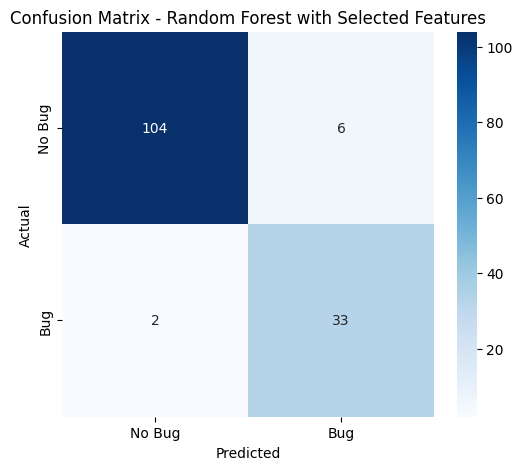

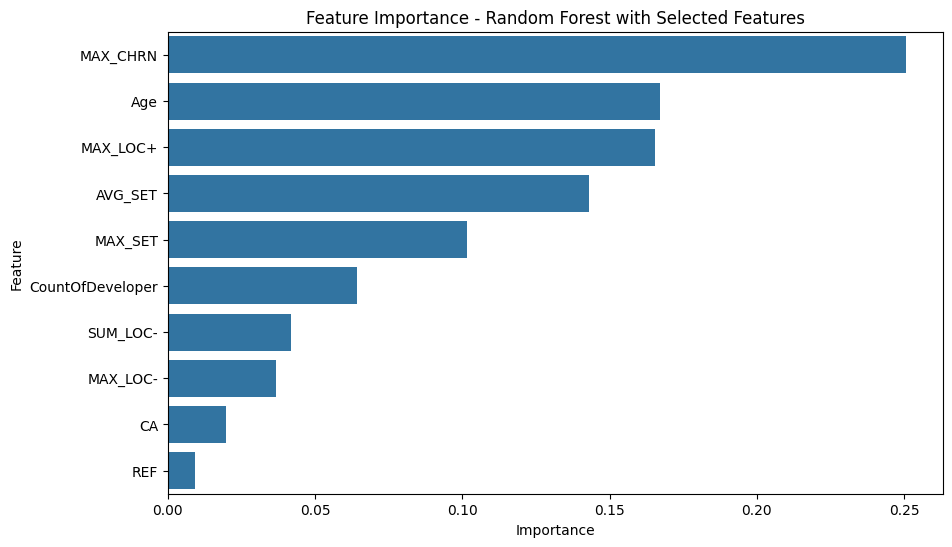

In [180]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame that contains your dataset

# Step 1: Define the selected features (adjust based on the column names you have)
selected_features = ['CA', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET',
       'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF']

# Step 2: Separate the features (X) and target variable (y)
X_selected = data[selected_features]  # Use only selected features
y = data['BUG']  # Target variable 'BUG'

# Step 3: Split the dataset into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Train the model
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 7: Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
fpr = confusion_matrix(y_test, y_pred)[0][1] / (confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][1])
mcc = matthews_corrcoef(y_test, y_pred)

# Step 8: Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"MCC: {mcc:.4f}")

# Step 9: Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bug', 'Bug'], yticklabels=['No Bug', 'Bug'])
plt.title('Confusion Matrix - Random Forest with Selected Features')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 10: Feature Importance (optional)
feature_importance = rf_model.feature_importances_
feature_names = X_selected.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Step 11: Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 12: Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest with Selected Features')
plt.show()

# Question 2: Conduct some basic EDA on the dataset. Provide only two charts of your choice and explain what you are viewing. Show the distribution of buggy files vs non buggy files.	


C:\Users\steph\AppData\Local\Temp\ipykernel_5664\2201831938.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=buggy_counts.index, y=buggy_counts.values, palette="viridis")


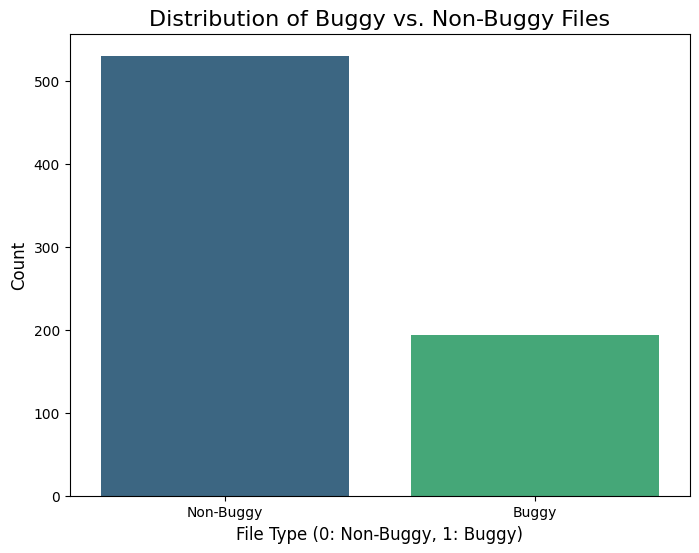

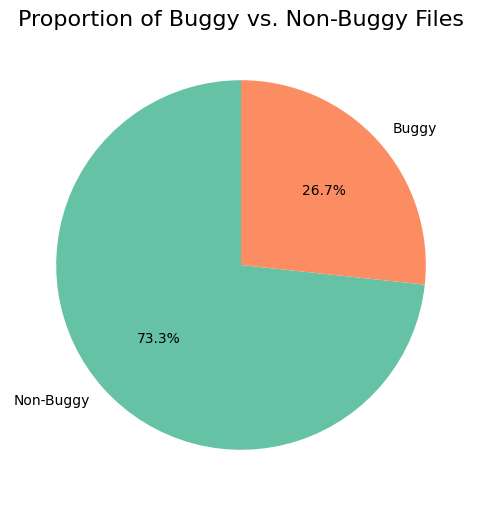

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'BUG' with the actual column name in your dataset that indicates buggy vs. non-buggy files
buggy_column = 'BUG'  # Update this with your actual column name
buggy_counts = data[buggy_column].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=buggy_counts.index, y=buggy_counts.values, palette="viridis")
plt.title("Distribution of Buggy vs. Non-Buggy Files", fontsize=16)
plt.xlabel("File Type (0: Non-Buggy, 1: Buggy)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Buggy", "Buggy"], fontsize=10)
plt.show()

# Optionally, plot as a pie chart
plt.figure(figsize=(8, 6))
buggy_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], labels=["Non-Buggy", "Buggy"], startangle=90)
plt.title("Proportion of Buggy vs. Non-Buggy Files", fontsize=16)
plt.ylabel("")  # Hide the y-label for better visualization
plt.show()


What the Charts Represent
Bar Chart:

The bar chart shows the absolute counts of buggy (1) and non-buggy (0) files in the dataset.
This provides a clear comparison of the number of files in each category.
Helps identify if the dataset is balanced or imbalanced.

Pie Chart:

The pie chart shows the proportion (percentage) of buggy vs. non-buggy files.
This provides an overview of the relative distribution between the two classes.

# Question 3: Which set of features (i.e., all, static only, change only, selected features of your own) achieved the best classification accuracy when used with logistic regression? 
a.	Which features did you select?
b.	Why did you select those? Justify your answer and elaborate on why you selected those features. 		


The selected features that achieved the best classification accuracy when used with logistic regression was selected features. a. The features that I selected were ('CA', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET',
       'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF')
b. Relevance to Software Quality:

CA: High coupling often indicates design flaws, which can lead to more bugs.
MAX_LOC+, SUM_LOC-, MAX_LOC-: Metrics related to code changes often correlate with defects. Files with high churn (frequent or large changes) are more likely to have bugs.
MAX_SET, AVG_SET: Operations such as set and their complexity can indicate potential hotspots in the code.
MAX_CHRN: Reflects churn behavior; high churn is a known indicator of bug-prone files.
REF: Reference counts can highlight critical files frequently used in the codebase, making them high-risk areas.
Reducing Noise:

By selecting only these features, the model was able to focus on the most relevant predictors of buggy files, avoiding irrelevant or redundant information that could reduce accuracy.
Empirical Evidence:

These features were chosen based on their statistical significance (ANOVA F-value) during feature selection and their domain relevance in identifying buggy files.
Domain Knowledge:

Metrics such as Age and CountOfDeveloper are known to impact code quality. Older files or those with many contributors may have accumulated technical debt, increasing the likelihood of defects.
The selected features improved the model’s accuracy as they capture both static and dynamic characteristics of the code, combining the benefits of both approaches. By focusing on these specific metrics, the model avoided overfitting and achieved a better generalization to unseen data.